In [16]:
import numpy as np
from activation import softmax, sigmoid, relu
from loss import mse, cross_entropy_err
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [17]:
x = mnist['data']
y = mnist['target']

In [18]:
y = y.astype(np.int)
t = np.zeros((y.size,np.unique(y).size))

C:\Users\user\AppData\Local\Temp/ipykernel_12340/3609945712.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


In [19]:
for i in range(y.size):
    t[i,y[i]] = 1

In [20]:
def SimpleLayer(x,y):
    W = np.random.randn(x,y)
    b = np.random.randn(y)
    network = {'W':W, 'b':b}
    return network

In [21]:
def softmax(x):
    c = np.max(x,axis=1).reshape(-1,1)
    a = x - c
    return np.exp(a)/np.sum(np.exp(a),axis=1).reshape(-1,1)

In [22]:
x = np.random.randn(4,3)
softmax(x)

array([[0.08629229, 0.69890051, 0.2148072 ],
       [0.29649309, 0.52898046, 0.17452645],
       [0.54104964, 0.11717086, 0.34177951],
       [0.24333606, 0.30273515, 0.45392879]])

In [23]:
np.max(x,axis=1).reshape(-1,1)

array([[-0.15241307],
       [ 1.20597594],
       [ 1.22331186],
       [ 0.43601692]])

In [24]:
init_network = SimpleLayer(x.shape[1],t.shape[1])

In [25]:
W, b = init_network['W'], init_network['b']

In [26]:
y = softmax(np.dot(x,W)+b)

In [27]:
y

array([[2.06719210e-03, 5.73645360e-02, 1.63437039e-03, 1.39799893e-03,
        7.31024532e-03, 1.05655533e-03, 4.44690546e-03, 1.96640219e-03,
        1.21735568e-06, 9.22754577e-01],
       [9.31824178e-01, 1.93319697e-04, 3.67010697e-03, 1.46487743e-02,
        4.79830004e-03, 1.23797302e-03, 2.15547699e-02, 8.33087036e-03,
        1.31658385e-02, 5.75869532e-04],
       [1.59008377e-01, 1.03392287e-03, 1.06420465e-01, 5.78420973e-01,
        7.97744542e-03, 1.09845299e-02, 2.48115450e-03, 2.75639137e-02,
        9.13265078e-02, 1.47827114e-02],
       [3.02322948e-01, 1.61699826e-02, 1.25237951e-01, 2.97326614e-01,
        3.22105248e-02, 1.86415029e-02, 1.51876162e-02, 4.19054789e-02,
        8.89868660e-03, 1.42098694e-01]])

In [28]:
c = np.max(x,axis=1)

In [29]:
c

array([-0.15241307,  1.20597594,  1.22331186,  0.43601692])

In [30]:
cross_entropy_err(y,t)

ValueError: operands could not be broadcast together with shapes (70000,10) (4,10) 

In [ ]:
np.dot(x,init_network['W']).shape

(70000, 10)

In [ ]:
np.random.randint(10,100,1)

array([13])

In [ ]:
init_network['W'].shape

(70000, 10)

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y+ 1e-7)) / batch_size


In [ ]:
cross_entropy_error(y,t)

1015035.0907345656

In [ ]:
y.shape

(10, 70000)

In [ ]:
def fx(x):
    return x**3 - 3*x**2 + 3

In [ ]:
def _diff(f,x):
    h = 1e-5
    fx = f
    return (fx(x+h)-fx(x))/h

In [ ]:
_diff(fx,np.array([1,2,3]))

array([-3.00000000e+00,  3.00001801e-05,  9.00006000e+00])

In [ ]:
def cross_entropy_err(y,t):
    delta = 1e-7
    return np.sum(-np.sum(t*np.log(y+delta)))/y.size

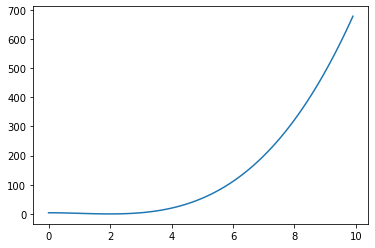

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(0,10,0.1)
y1 = fx(x)

plt.plot(x,y)

In [ ]:
def _diff2(x)